# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = ""

# api key
api_key='7b1bbb94583d51a9871aab6fb0cea12c'
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [7]:
print(requests.get(url+'&q=accra').json())

{'coord': {'lon': -0.2, 'lat': 5.56}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 85.84, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1011, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 200}, 'clouds': {'all': 40}, 'dt': 1593231171, 'sys': {'type': 1, 'id': 1126, 'country': 'GH', 'sunrise': 1593237034, 'sunset': 1593281824}, 'timezone': 0, 'id': 2306104, 'name': 'Accra', 'cod': 200}


## Generate Cities List

In [8]:
location_data = pd.DataFrame()
location_data['lat_values'] = [np.random.uniform(-90,90) for x in range(1500)]
location_data['lng_values'] = [np.random.uniform(-180, 180) for x in range(1500)]

location_data.head()

,lat_values,lng_values
0,-78.853927,18.746087
1,-61.288860,130.515981
2,-42.201159,-117.928391
3,3.539753,63.125891
4,-41.149017,157.149138


In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# create url with %20 so it works
    # city = city.replace(" ", "%20")

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [10]:
print(cities)

['coihaique', 'longyearbyen', 'cape town', 'mataura', 'puerto ayora', 'hasaki', 'chumikan', 'hobart', 'ontario', 'hithadhoo', 'ushuaia', 'santa cruz de la palma', 'punta arenas', 'rio grande', 'vaini', 'padang', 'rikitea', 'hermanus', 'bluff', 'sentyabrskiy', 'albany', 'guadalupe y calvo', 'lavrentiya', 'east london', 'georgetown', 'calama', 'thompson', 'grand-santi', 'tuatapere', 'emerald', 'nikolskoye', 'lorengau', 'fereydun kenar', 'homun', 'sumbawa', 'lao cai', 'aklavik', 'hualmay', 'lhokseumawe', 'armacao dos buzios', 'busselton', 'palu', 'kursk', 'attawapiskat', 'fayaoue', 'biltine', 'butaritari', 'grand river south east', 'batagay-alyta', 'victor harbor', 'new norfolk', 'port blair', 'pirapora', 'souillac', 'bathsheba', 'labuhan', 'touros', 'cidreira', 'jamestown', 'luwuk', 'samarai', 'inongo', 'taraz', 'pacific grove', 'natal', 'arraial do cabo', 'upernavik', 'sorland', 'alice springs', 'tessalit', 'carnarvon', 'bandarbeyla', 'camapua', 'shablykino', 'shakawe', 'kautokeino', 'p

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
# Create a DataFrame for weather information
city_weather=pd.DataFrame()

# Create categories to put in dataframe
City_title=[]
Wind_Speed=[]
Humidity=[]
Date=[]
Longitude=[]
Latitude=[]
Max_Temperature=[]
Clouds=[]
Country=[]



In [13]:
# Use a loop to append the data conditionally based on the city

# Initialize the counter of the city data

Count_ = 0

for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json()
        Country_= response["sys"]["country"]
        Country.append(response["sys"]["country"])
        Latitude.append(response["coord"]["lat"])
        Longitude.append(response["coord"]["lon"])
        Date.append(response["dt"])
        Wind_Speed.append(response["wind"]["speed"])
        Humidity.append(response["main"]["humidity"])
        Max_Temperature.append(response["main"]["temp_max"])
        Clouds.append(response["clouds"]["all"])
        
        # Making sure length of the list is the same
        City_title.append(city)
        
        Count_ = Count_+1
        # print(f"{city} is found. City number is {Count_}")


        # Add in a delay in order to stay within the limits of API
        # time.sleep()

    # Print city not found if there is no data
    except KeyError:
        print("city not found")
    continue

city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found
city not found


In [19]:
Weather_dict= {
    'Date':Date,
    'Latitude':Latitude,
    'Longitude':Longitude,
    'City':City_title,
    'Country':Country,
    'Cloud Cover':Clouds,
    'Wind Speed':Wind_Speed,
    'Humidity':Humidity,
    'Max Temperature':Max_Temperature,
    }
Weather_data=pd.DataFrame(Weather_dict)
Weather_data

,Date,Latitude,Longitude,City,Country,Cloud Cover,Wind Speed,Humidity,Max Temperature
0,1593231506,-45.58,-72.07,coihaique,CL,90,5.82,74,30.20
1,1593231110,78.22,15.64,longyearbyen,SJ,75,17.22,80,41.00
2,1593231301,-33.93,18.42,cape town,ZA,75,26.40,87,60.01
3,1593231328,-46.19,168.86,mataura,NZ,62,2.15,77,46.63
4,1593231202,-0.74,-90.35,puerto ayora,EC,80,1.01,92,70.00
...,...,...,...,...,...,...,...,...,...
560,1593231351,33.19,-82.53,avera,US,1,5.82,73,77.00
561,1593231563,45.82,44.65,iki-burul,RU,0,11.18,37,69.80
562,1593231563,-6.22,155.63,kieta,PG,94,10.98,80,81.57
563,1593231563,61.99,5.14,raudeberg,NO,32,10.29,82,66.99


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
# Exporting file to csv
Weather_data.to_csv(r'C:\Users\akibo\Desktop\Columbia Bootcamp\Python-API-Weather\Resources\Weather_Data')

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [26]:
Weather_data.dtypes

Date                 int64
Latitude           float64
Longitude          float64
City                object
Country             object
Cloud Cover          int64
Wind Speed         float64
Humidity             int64
Max Temperature    float64
dtype: object

In [36]:
#  Get the indices of cities that have humidity over 100%.
Weather_data['Humidity']=Weather_data['Humidity'].astype(int)
Weather_data_h=Weather_data.loc[Weather_data['Humidity']<=100]
Weather_data_h

,Date,Latitude,Longitude,City,Country,Cloud Cover,Wind Speed,Humidity,Max Temperature
0,1593231506,-45.58,-72.07,coihaique,CL,90,5.82,74,30.20
1,1593231110,78.22,15.64,longyearbyen,SJ,75,17.22,80,41.00
2,1593231301,-33.93,18.42,cape town,ZA,75,26.40,87,60.01
3,1593231328,-46.19,168.86,mataura,NZ,62,2.15,77,46.63
4,1593231202,-0.74,-90.35,puerto ayora,EC,80,1.01,92,70.00
...,...,...,...,...,...,...,...,...,...
560,1593231351,33.19,-82.53,avera,US,1,5.82,73,77.00
561,1593231563,45.82,44.65,iki-burul,RU,0,11.18,37,69.80
562,1593231563,-6.22,155.63,kieta,PG,94,10.98,80,81.57
563,1593231563,61.99,5.14,raudeberg,NO,32,10.29,82,66.99


In [10]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

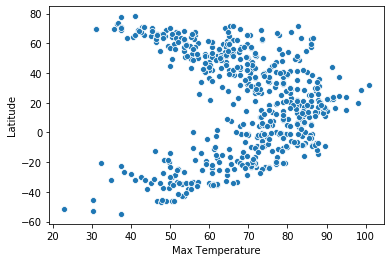

In [39]:
sns.scatterplot(Weather_data_h['Max Temperature'],Weather_data_h['Latitude'])

## Latitude vs. Humidity Plot

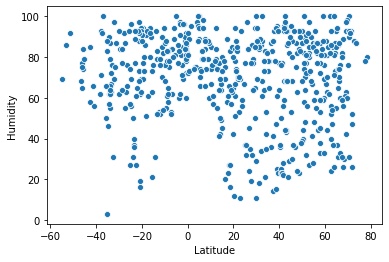

In [40]:
sns.scatterplot(Weather_data_h['Latitude'],Weather_data_h['Humidity'])

## Latitude vs. Cloudiness Plot

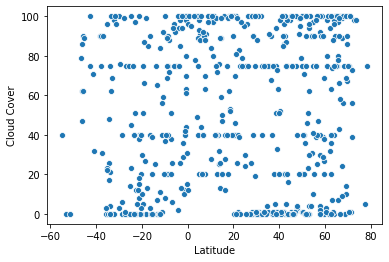

In [41]:
sns.scatterplot(Weather_data_h['Latitude'],Weather_data_h['Cloud Cover'])

## Latitude vs. Wind Speed Plot

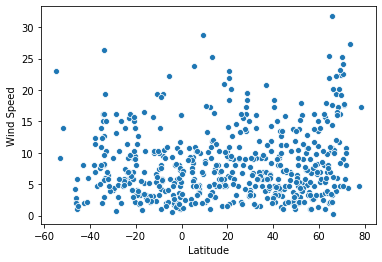

In [42]:
sns.scatterplot(Weather_data_h['Latitude'],Weather_data_h['Wind Speed'])

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
def regres(x,y):
    


In [43]:
# Create Northern and Southern Hemisphere DataFrames
Weather_data_hn=Weather_data_h.loc[Weather_data_h['Latitude']>=0]
Weather_data_hs=Weather_data_h.loc[Weather_data_h['Latitude']<=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

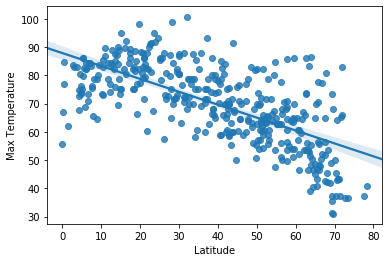

In [51]:
sns.regplot(Weather_data_hn['Latitude'],Weather_data_hn['Max Temperature'])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

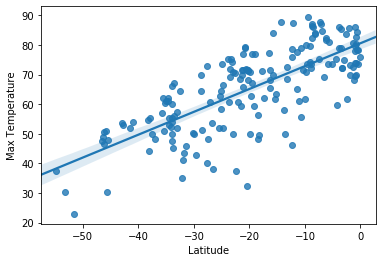

In [52]:
sns.regplot(Weather_data_hs['Latitude'],Weather_data_hs['Max Temperature'])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

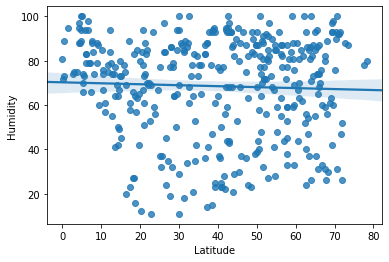

In [53]:
sns.regplot(Weather_data_hn['Latitude'],Weather_data_hn['Humidity'])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

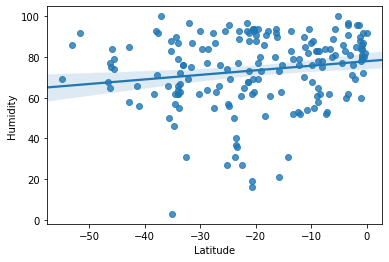

In [54]:
sns.regplot(Weather_data_hs['Latitude'],Weather_data_hs['Humidity'])

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05768812657005063


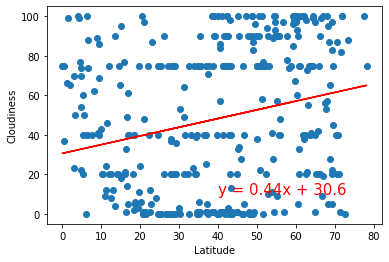

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0684912094859049


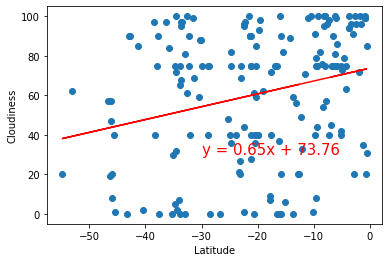

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023371104533850804


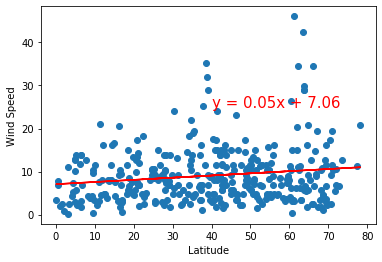

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03381889207758188


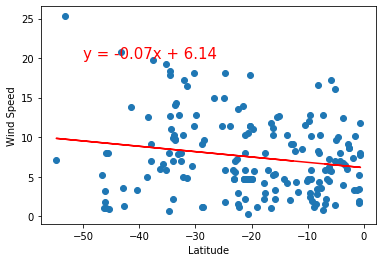